In [32]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
RANDOM_STATE = 0

In [33]:
# load the train and test set with the engineered variables
# we built and saved these datasets in a previous notebook.

X_train = pd.read_csv('models/xtrain.csv')
X_valid = pd.read_csv('models/xvalid.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,{var}_na
0,0.750000,0.75,0.461171,0.355980,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0
1,0.750000,0.75,0.456066,0.377977,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0
2,0.916667,0.75,0.394699,0.326692,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0
3,0.750000,0.75,0.445002,0.471525,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,0.0
4,0.750000,0.75,0.577658,0.381185,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0


In [34]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('models/ytrain.csv')
y_valid = pd.read_csv('models/yvalid.csv')

y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


In [35]:
# load the pre-selected features in a previous notebook (03)
features = pd.read_csv('models/selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [36]:
X_train = X_train[features]
X_valid = X_valid[features]

In [37]:
lin_model = Lasso(alpha=0.001, random_state=RANDOM_STATE)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [38]:
# evaluate the model:

# train performance
pred = lin_model.predict(X_train)
print(f'train mse: \t{int(mean_squared_error(np.exp(y_train), np.exp(pred)))}')
print(f'train rmse: \t{int(mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))}')
print(f'train r2: \t{r2_score(np.exp(y_train), np.exp(pred))}')

print()

# valid performance
pred = lin_model.predict(X_valid)
print(f'valid mse: \t{int(mean_squared_error(np.exp(y_valid), np.exp(pred)))}')
print(f'valid rmse: \t{int(mean_squared_error(np.exp(y_valid), np.exp(pred), squared=False))}')
print(f'valid r2: \t{r2_score(np.exp(y_valid), np.exp(pred))}')

train mse: 	772488014
train rmse: 	27793
train r2: 	0.8762798181961993

valid mse: 	1077047535
valid rmse: 	32818
valid r2: 	0.8432727783434518


In [39]:
print('Average house price: ', int(np.exp(y_train).median()))

Average house price:  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

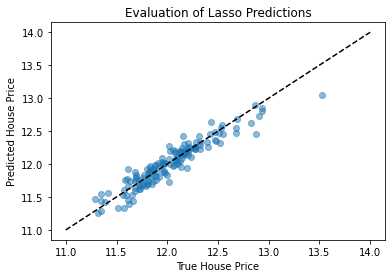

In [40]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_valid, lin_model.predict(X_valid), alpha=0.5)
plt.plot(range(11, 15), range(11, 15), 'k--')
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

We can see that our model is doing a pretty good job at estimating house prices.

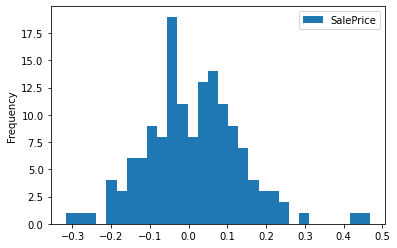

In [41]:
(y_valid - pd.DataFrame(lin_model.predict(X_valid), columns=['SalePrice'])).plot.hist(bins=30);

## Feature importance

Text(0.5, 1.0, 'Feature Importance')

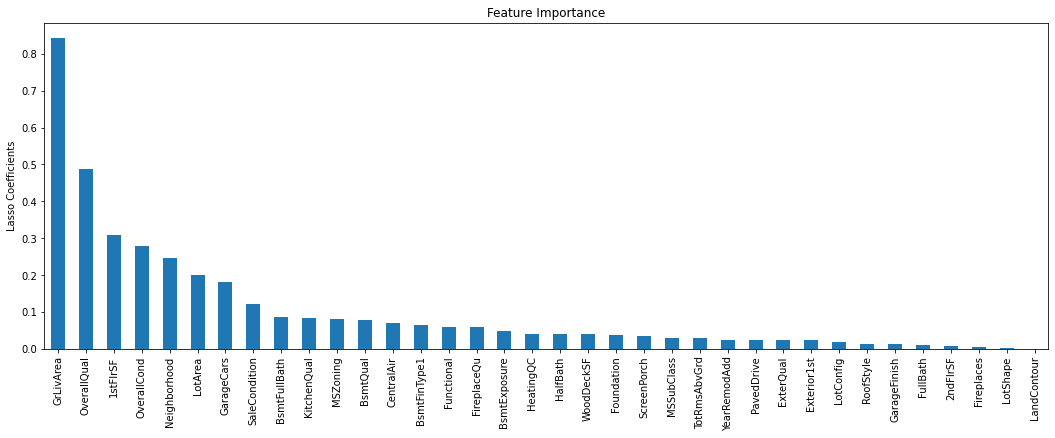

In [42]:
# Finally, just for fun, let's look at the feature importance
importance = pd.Series(np.abs(lin_model.coef_))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')


In [43]:
# save the model
joblib.dump(lin_model, 'models/linear_regression.joblib')

['models/linear_regression.joblib']